# Load Data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


# Exploratory Analysis

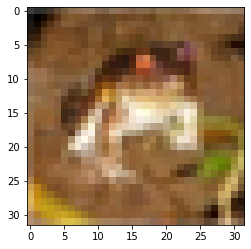

In [4]:
plt.imshow(x_train[0]) #The feature is an image in pixels

In [5]:
x_train[1].shape # Each value of the feature is a 32*32 arrey with 3 colours

(32, 32, 3)

In [6]:
y_train[0] #Each value of the class is a number indicating the specific class

array([6], dtype=uint8)

In [7]:
print(len(np.unique(y_train))) #There are totally 10 classes

10


Label: [6]


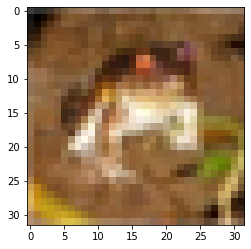

Label: [9]


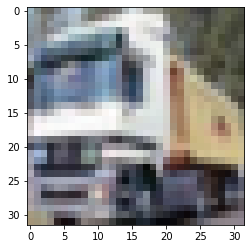

Label: [9]


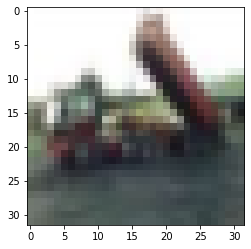

Label: [4]


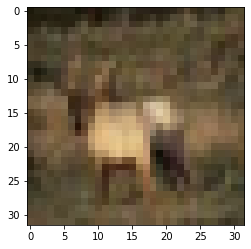

Label: [1]


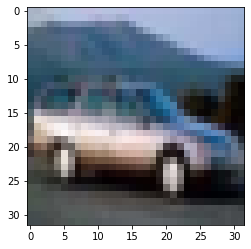

In [8]:
for i in range(5):
  print(f'Label: {y_train[i]}')
  plt.imshow(x_train[i], cmap='gray')
  plt.show()

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


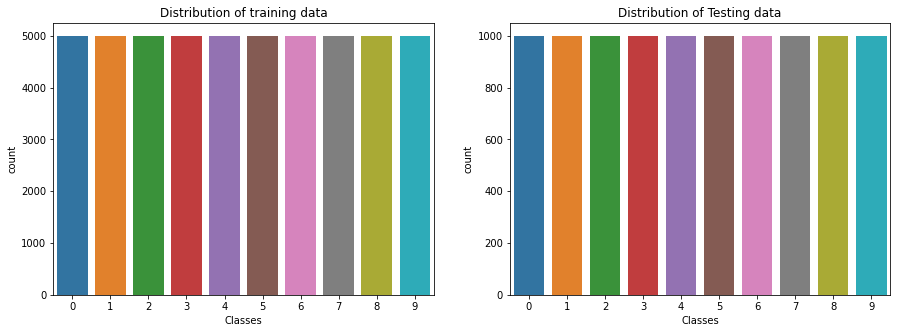

In [9]:
import seaborn as sns
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

# Data Prerocessing

#### Normalization

In [10]:
x_train, x_test = x_train/255, x_test/255

#### Reshape the data

In [4]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [11]:
x_train[0].shape

(32, 32, 3)

# Build The Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Empty Model
model = keras.models.Sequential()

#The CNN Layer 1
model.add(keras.layers.Conv2D(filters = 64, 
                              kernel_size = (4, 4), 
                              strides=1, 
                              padding='valid', 
                              activation='relu', 
                              input_shape=(32, 32, 3)))
#The CNN Layer 2
model.add(keras.layers.Conv2D(filters = 32, 
                              kernel_size = (3, 3), 
                              strides=1, 
                              padding='valid', 
                              activation='relu', 
                              input_shape=(32, 32, 3)))

#Pooling
model.add(keras.layers.MaxPooling2D((2, 2)))

#The ANN Layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


2022-07-12 20:31:33.952677: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 64)        3136      
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                        

#Train the model

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [15]:
model_history = model.fit(
                          x_train, y_train, 
                          epochs=30,
                          batch_size= 64)

Epoch 1/30
782/782 [==============================] - 67s 85ms/step - loss: 1.4598 - accuracy: 0.4707
Epoch 2/30
626/782 [=======================>......] - ETA: 13s - loss: 1.1078 - accuracy: 0.6057

KeyboardInterrupt: 

####Check the Training Path

In [10]:
loss = model_history.history['loss']
acc = model_history.history['accuracy']
epoch = range(len(loss))

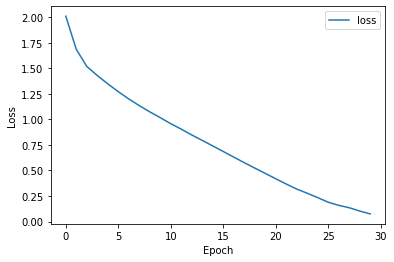

In [11]:
import matplotlib.pyplot as plt

plt.plot(epoch, loss, label = "loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

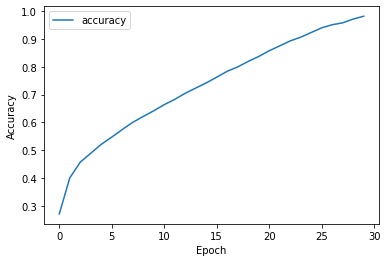

In [12]:
plt.plot(epoch, acc, label = 'accuracy')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Evaludate the Model

In [13]:
model.evaluate(x_test,y_test) #The accuracy is around 62.%, overfitting a lot

313/313 [==============================] - 19s 61ms/step - loss: 2.0298 - accuracy: 0.6204


[2.029785633087158, 0.6204000115394592]

In [14]:
predictions_cnn = model.predict(x_test)

In [17]:
y_predict = np.argmax(predictions_cnn,axis=1)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1000
           1       0.78      0.69      0.73      1000
           2       0.49      0.57      0.53      1000
           3       0.40      0.60      0.48      1000
           4       0.57      0.48      0.52      1000
           5       0.57      0.38      0.46      1000
           6       0.62      0.76      0.69      1000
           7       0.82      0.54      0.65      1000
           8       0.74      0.77      0.75      1000
           9       0.68      0.72      0.70      1000

    accuracy                           0.62     10000
   macro avg       0.64      0.62      0.62     10000
weighted avg       0.64      0.62      0.62     10000



In [ ]:
!pip install scikit-plot

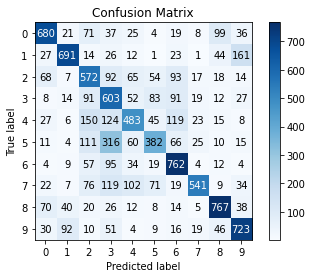

In [24]:
#Output Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_predict)
# It seems that the model has a huge frequency to classify class 5(dog) to 3(cat)

#Parameter Tunning with new model

In [8]:
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
model_history = model.fit(
                          x_train, y_train, 
                          epochs=50,
                          batch_size= 64)

Epoch 1/50
782/782 [==============================] - 242s 308ms/step - loss: 2.4305 - accuracy: 0.1494
Epoch 2/50
782/782 [==============================] - 235s 300ms/step - loss: 2.0754 - accuracy: 0.2422
Epoch 3/50
782/782 [==============================] - 235s 300ms/step - loss: 1.8763 - accuracy: 0.3103
Epoch 4/50
782/782 [==============================] - 236s 302ms/step - loss: 1.7395 - accuracy: 0.3639
Epoch 5/50
782/782 [==============================] - 236s 301ms/step - loss: 1.6530 - accuracy: 0.3972
Epoch 6/50
782/782 [==============================] - 235s 301ms/step - loss: 1.5854 - accuracy: 0.4228
Epoch 7/50
782/782 [==============================] - 237s 303ms/step - loss: 1.5091 - accuracy: 0.4567
Epoch 8/50
782/782 [==============================] - 236s 302ms/step - loss: 1.4377 - accuracy: 0.4849
Epoch 9/50
782/782 [==============================] - 235s 301ms/step - loss: 1.3784 - accuracy: 0.5105
Epoch 10/50
782/782 [==============================] - 235s 300m

In [13]:
loss = model_history.history['loss']
acc = model_history.history['accuracy']
epoch = range(len(loss))

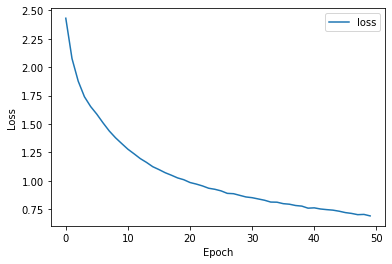

In [14]:
import matplotlib.pyplot as plt

plt.plot(epoch, loss, label = "loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

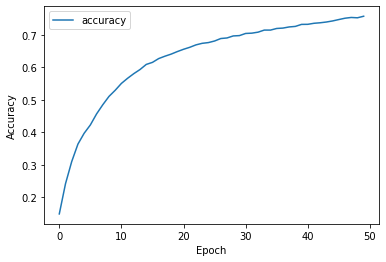

In [15]:
plt.plot(epoch, acc, label = 'accuracy')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Evaluate the new model

In [16]:
model.evaluate(x_test,y_test) #higher accuracy and solve the overfitting

313/313 [==============================] - 13s 40ms/step - loss: 0.7268 - accuracy: 0.7524


[0.7267752289772034, 0.7523999810218811]

In [17]:
predictions_cnn = model.predict(x_test)

In [18]:
y_predict = np.argmax(predictions_cnn,axis=1)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.87      0.89      0.88      1000
           2       0.63      0.68      0.65      1000
           3       0.55      0.58      0.57      1000
           4       0.74      0.66      0.70      1000
           5       0.62      0.71      0.66      1000
           6       0.79      0.83      0.81      1000
           7       0.85      0.75      0.80      1000
           8       0.88      0.81      0.84      1000
           9       0.88      0.82      0.85      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



In [20]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


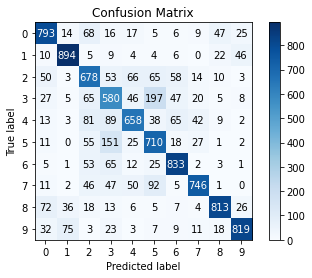

In [21]:
#Output Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_predict)
# The accuracy, precison and recall improves for each class